In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from pre import Training_data
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
_AMOUNT_CLASSE = 11
try:
    #import model
    model1 = keras.models.load_model('model1')
    model2 = keras.models.load_model('model2')
except:
    print('model is missing or wrong name')

#making object of custom class
test_data = Training_data('test',_AMOUNT_CLASSE)

#importing the test data
test_dices = np.load('test_data.npy')
test_labels = np.load('test_labels.npy')

Files already exis, import them!
data: test_data.npy| labels: test_labels.npy


In [3]:
#shuffle data
test_dices, test_labels = test_data.shuffle_2_arrays(test_dices,test_labels)
test_labels = test_labels.flatten()

In [4]:
#predict 
prediction1 = model1.predict(test_dices)
prediction2 = model2.predict(test_dices)

In [5]:
def get_prediction(prediction):
    _predition = []
    for i in range(len(prediction)):
        _predition.append(np.argmax(prediction[i]))
    return _predition


_predition1 = get_prediction(prediction1)
_predition2 = get_prediction(prediction2)


In [6]:
#MODEL1
print(classification_report(y_true=test_labels,y_pred=_predition1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       1.00      0.95      0.97        40
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        26
           5       0.92      1.00      0.96        22
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00        37
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        30

    accuracy                           0.99       330
   macro avg       0.99      1.00      0.99       330
weighted avg       0.99      0.99      0.99       330



In [7]:
#MODEL2
print(classification_report(y_true=test_labels,y_pred=_predition2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00        37
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        30

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



In [8]:
cm1 = confusion_matrix(test_labels,_predition1)
cm1

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 26,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 30]], dtype=int64)

In [9]:
cm2 = confusion_matrix(test_labels,_predition2)
cm2

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 26,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 30]], dtype=int64)

In [20]:
#array_test1 = test_data.img_to_array("C:/Users/Seba/Downloads/pngegg.png")
array_test2 = test_data.img_to_array("C:/Users/Seba/Downloads/03.png")
array_test3 = test_data.img_to_array("C:/Users/Seba/Downloads/04.png")
array_test4 = test_data.img_to_array("C:/Users/Seba/Downloads/05.png")
array_test5 = test_data.img_to_array("C:/Users/Seba/Downloads/06.png")
array_test6 = test_data.img_to_array("C:/Users/Seba/Downloads/bigger.png")

model1: 0
0.21313034
model2: 1
0.26948446


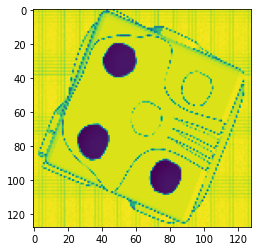

In [16]:
test_pred1 = model1.predict(array_test2)
test_pred2 = model2.predict(array_test2)

print('model1: '+str(np.argmax(test_pred1[0])))
print(test_pred1[0][np.argmax(test_pred1[0])])
print('model2: '+str(np.argmax(test_pred2[0])))
print(test_pred2[0][np.argmax(test_pred2[0])])

plt.imshow(array_test2[0])

model1: 6
0.23943835
model2: 6
0.5647956


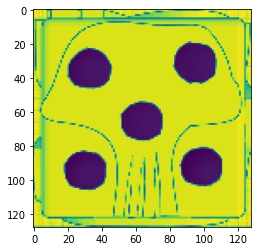

In [17]:
test_pred1 = model1.predict(array_test3)
test_pred2 = model2.predict(array_test3)

print('model1: '+str(np.argmax(test_pred1[0])))
print(test_pred1[0][np.argmax(test_pred1[0])])
print('model2: '+str(np.argmax(test_pred2[0])))
print(test_pred2[0][np.argmax(test_pred2[0])])

plt.imshow(array_test3[0])

model1: 0
0.20065936
model2: 0
0.3687658


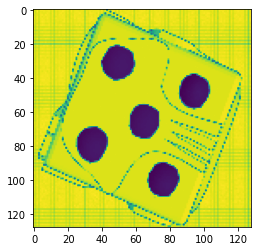

In [18]:
test_pred1 = model1.predict(array_test4)
test_pred2 = model2.predict(array_test4)

print('model1: '+str(np.argmax(test_pred1[0])))
print(test_pred1[0][np.argmax(test_pred1[0])])
print('model2: '+str(np.argmax(test_pred2[0])))
print(test_pred2[0][np.argmax(test_pred2[0])])

plt.imshow(array_test4[0])

model1: 0
0.20065936
model2: 0
0.3687658


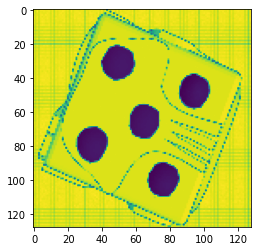

In [19]:
test_pred1 = model1.predict(array_test5)
test_pred2 = model2.predict(array_test5)

print('model1: '+str(np.argmax(test_pred1[0])))
print(test_pred1[0][np.argmax(test_pred1[0])])
print('model2: '+str(np.argmax(test_pred2[0])))
print(test_pred2[0][np.argmax(test_pred2[0])])

plt.imshow(array_test5[0])

In [21]:
test_pred1 = model1.predict(array_test6)
test_pred2 = model2.predict(array_test6)

print('model1: '+str(np.argmax(test_pred1[0])))
print(test_pred1[0][np.argmax(test_pred1[0])])
print('model2: '+str(np.argmax(test_pred2[0])))
print(test_pred2[0][np.argmax(test_pred2[0])])

plt.imshow(array_test6[0])

ValueError: in user code:

    File "C:\Users\Seba\anaconda3\envs\gpu_tf\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Seba\anaconda3\envs\gpu_tf\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Seba\anaconda3\envs\gpu_tf\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Seba\anaconda3\envs\gpu_tf\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\Seba\anaconda3\envs\gpu_tf\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Seba\anaconda3\envs\gpu_tf\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 128, 128, 1), found shape=(None, 448, 439, 1)
